## Pytorch Workflows

In [1]:
what_we_are_covering = { 1: "load data",
                        2: "build or use a pretrained model",
                        3: "fitting the model",
                        4: "make predictions and Evaluate",
                        5: "saving and loading the model",
                        6: "putting this all together"
                        }
what_we_are_covering

{1: 'load data',
 2: 'build or use a pretrained model',
 3: 'fitting the model',
 4: 'make predictions and Evaluate',
 5: 'saving and loading the model',
 6: 'putting this all together'}

In [2]:
import torch
torch.__version__

'1.13.1'

## Linear regresion

In [3]:
#Create known parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Splitng data into training and Test sets
     1.Training Set
     2. Validation Set
     3. Test Set

In [4]:
len(X), len(y)

(50, 50)

In [5]:
train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

## Data Visualisation

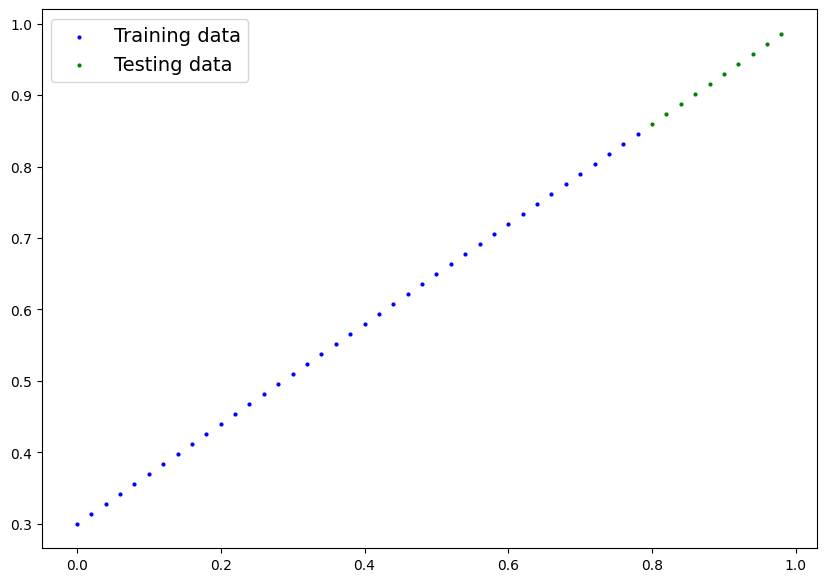

In [6]:
def plot_predictions(train_data= X_train,
                    train_labels= y_train,
                    test_data= X_test,
                    test_labels = y_test,
                    predictions= None):

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,7))
    
    #Plot training data in blues
    plt.scatter(train_data, train_labels, c="b", s=4,label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4,label="Testing data")
    
    #are there predictions ?
    # Plot the predictions if they exist
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})
plot_predictions()
    

## Build first pytorch model
    Linear regression
        Y = a + bX
        
    What Model does:
    * start with random values
    * look at the data and adjust the random value to data represent( or get closser to)
    
    How does it do this :
    
        . Linear regresion
        . Backpropogation

In [7]:
from torch import nn

class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                               dtype= torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                               dtype= torch.float))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias  # This is regresion forward operation
    

In [8]:
### Checking the contents of our Pytorch Model
torch.manual_seed(42)

#create model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
#List Named parameters
list(model_0.named_parameters())
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

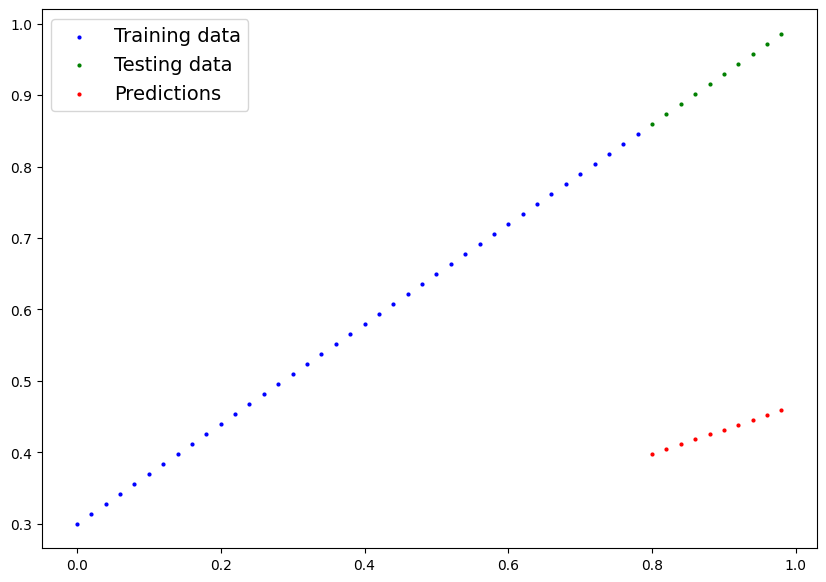

In [11]:
plot_predictions(predictions = y_preds)

### pytorh moel building essentials module and classt to look for
* torch.nn
* torch.nn.Parameter
* torch.n. Module
* torch.optim
* torch.utils.data.Dataset
* torch.utils.data.DataLoader
* torch.utils.tensorBoard

## train Model
The whole idea of training is the Model from moving some Unknown Parametere to
some Known parameters.
Or in other words from a poor representation to better representation
Things we need to train
* Measure the differene by using the loss function/Cost function.
* **Optimizer** Take into account the loss of a model and adjust the model parameters to improve the loss.

In [12]:
## Setup and Loss function
loss_fn = torch.nn.L1Loss()

# Setup the Optimizerv: using Stochastic Gradient Descent
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)   # lr= learnign rate = possibly the most important parameter you can tune ::-> hyperparameter


In [13]:
## An epoch is one loop through the whole data.. Hyperparameter
torch.manual_seed(42)
epochs = 300
log_stats_post = 10

#Track experiments
epoch_counts = []
loss_values = []
test_lost_values = []

### Training 
for epoch in range(epochs):
    # set the model to training data
    model_0.train() # turn on gradient
    # 2. forward pass
    y_pred = model_0.forward(X_train)
    
    # 3 Calculate loss
    loss = loss_fn(y_pred,y_train)
    
    #4 Optimizer zero grad
    optimizer.zero_grad()
    
    #5 Loss backword -> backpropogation of loss
    loss.backward()
    
    # 6. Optimizer Step
    optimizer.step()
    
#     tuns off different settings in model not required for evaluation/Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Do the fwd pass
        test_pred = model_0(X_test)

        # 2. Calculate the test loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % log_stats_post == 0:
        epoch_counts.append(epoch)
        loss_values.append(loss)
        test_lost_values.append(test_loss)
        print(f"Epoch : {epoch} | Loss: {loss} | test loss : {test_loss }")
        # print(model_0.state_dict())


Epoch : 0 | Loss: 0.31288138031959534 | test loss : 0.48106518387794495
Epoch : 10 | Loss: 0.1976713240146637 | test loss : 0.3463551998138428
Epoch : 20 | Loss: 0.08908725529909134 | test loss : 0.21729660034179688
Epoch : 30 | Loss: 0.053148526698350906 | test loss : 0.14464017748832703
Epoch : 40 | Loss: 0.04543796554207802 | test loss : 0.11360953003168106
Epoch : 50 | Loss: 0.04167863354086876 | test loss : 0.09919948130846024
Epoch : 60 | Loss: 0.03818932920694351 | test loss : 0.08886633068323135
Epoch : 70 | Loss: 0.03476089984178543 | test loss : 0.0805937647819519
Epoch : 80 | Loss: 0.03132382780313492 | test loss : 0.07232122868299484
Epoch : 90 | Loss: 0.02788740023970604 | test loss : 0.06473556160926819
Epoch : 100 | Loss: 0.024458957836031914 | test loss : 0.05646304413676262
Epoch : 110 | Loss: 0.021020209416747093 | test loss : 0.04819049686193466
Epoch : 120 | Loss: 0.01758546754717827 | test loss : 0.04060482233762741
Epoch : 130 | Loss: 0.014155392535030842 | test l

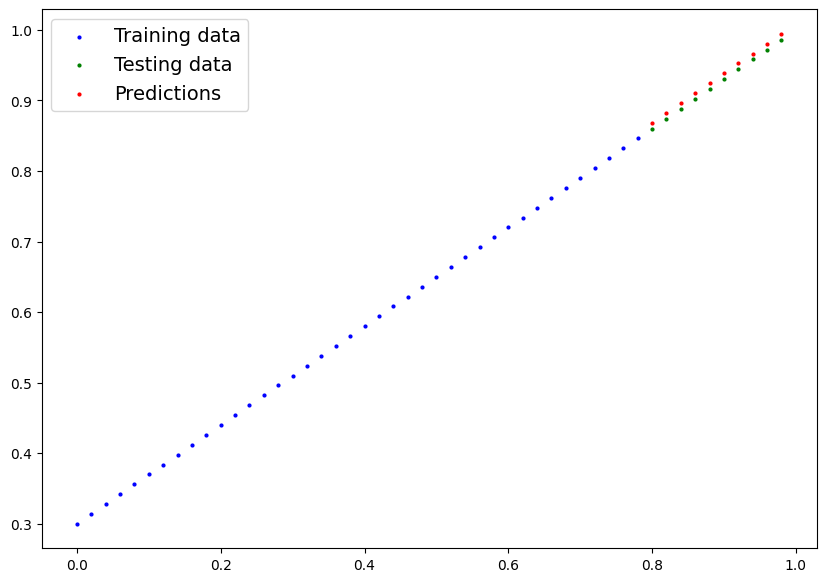

In [14]:
# plot the propogation to understand the model
plot_predictions(predictions = test_pred)

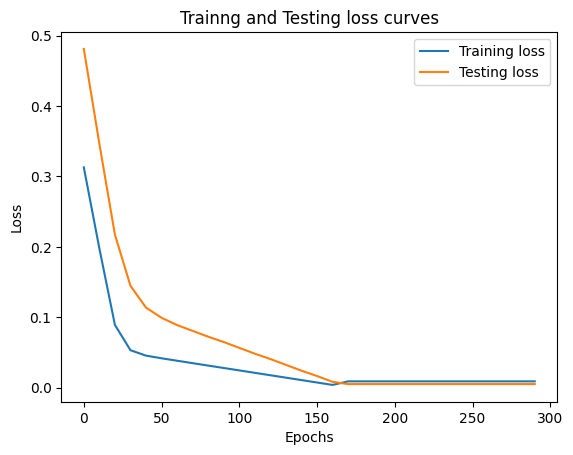

In [15]:

import matplotlib.pyplot as plt
import numpy as np
plt.plot(epoch_counts, np.array(torch.tensor(loss_values).numpy()), label="Training loss")
plt.plot(epoch_counts, np.array(torch.tensor(test_lost_values).numpy()), label="Testing loss")
plt.title("Trainng and Testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## Saving a model in Pytorch

There are three main methods saviong and Loading teh model in torch

1. `torch.save()`  save model in pickel format.
2. `torch.load()` 

In [16]:
from pathlib import Path
MODEL_PATHS = Path("models")
MODEL_PATHS.mkdir(parents=True, exist_ok=True)

# Create Model save path
MODEL_NAME = "o1_pytorch_workflow_0.pth"
MODEL_SAVE_PATH = MODEL_PATHS / MODEL_NAME

print(f"Savinf model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Savinf model to : models/o1_pytorch_workflow_0.pth


In [17]:
!ls -al models

total 8
drwxr-xr-x  4 amittomar  staff   128 Feb 13 14:53 .
drwxr-xr-x  6 amittomar  staff   192 Feb 13 15:15 ..
drwxr-xr-x  2 amittomar  staff    64 Feb 13 14:53 .ipynb_checkpoints
-rw-r--r--  1 amittomar  staff  1119 Feb 14 12:06 o1_pytorch_workflow_0.pth


In [18]:
## load the existing saved state_dict()
loaded_model_0 = LinearRegressionModel()

# Load the state_dict and set it to Model.
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

model_0.state_dict()




OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [19]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [20]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

model_0.eval()
with torch.inference_mode():
    model_preds = model_0(X_test)

print(loaded_model_preds == model_preds)
#plot_predictions(predictions=loaded_model_preds)
    

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


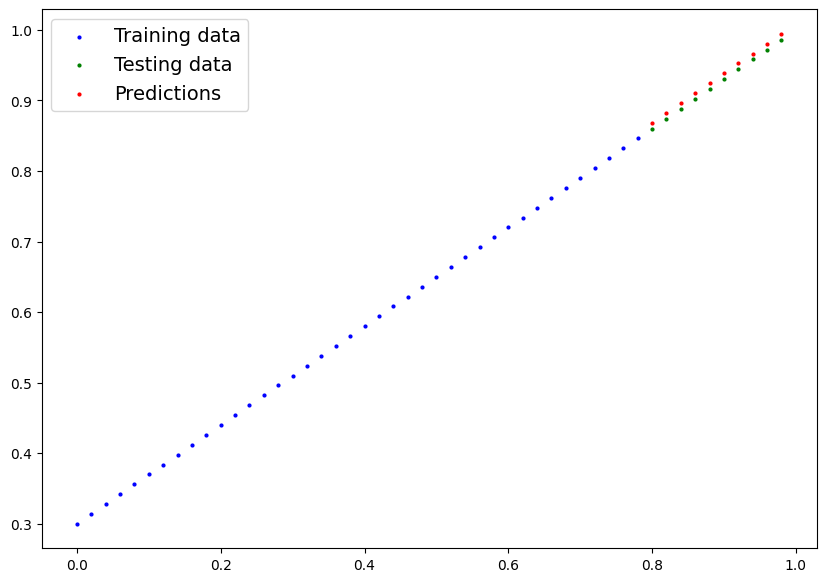

In [22]:
plot_predictions(predictions=loaded_model_preds)

### Putting it all together

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

1.13.1


### Create device agnosteic code. If GPu is available, use GPu else CPU by default

In [25]:
device = "Cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device : {device}")

Using device : cpu


### Data loading

In [33]:
#Cretae some data using lIner regression formula Y = weight + X * bias
weight = 0.7
bias = 0.3

#Create range values
start = 0
end = 1
step =0.02

X = torch.arange(start, end, step)
X = X.unsqueeze(dim=1)

# 
Y = weight + X* bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.7000],
         [0.7060],
         [0.7120],
         [0.7180],
         [0.7240],
         [0.7300],
         [0.7360],
         [0.7420],
         [0.7480],
         [0.7540]]))

In [36]:
## trainteng test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

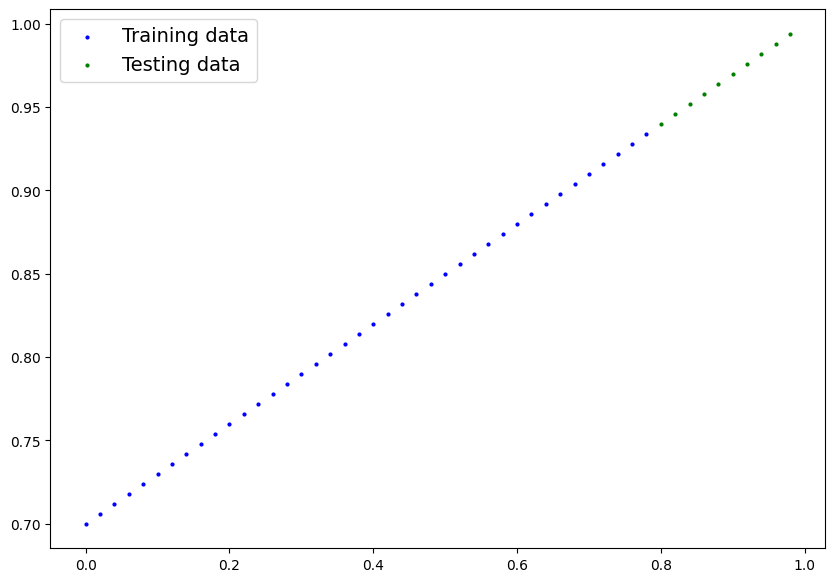

In [37]:
def plot_predictions(train_data= X_train,
                    train_labels= y_train,
                    test_data= X_test,
                    test_labels = y_test,
                    predictions= None):

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,7))
    
    #Plot training data in blues
    plt.scatter(train_data, train_labels, c="b", s=4,label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4,label="Testing data")
    
    #are there predictions ?
    # Plot the predictions if they exist
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})
plot_predictions()

In [47]:
# Building a torch Liner Model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
#         Using nn.Layer which is Linear regression
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self,x: torch.Tensor)-> torch.Tensor:
        return self.linear_layer(x)
#set the manula seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [48]:
device

'cpu'

### Training loop

    * loss function
    * optimizer
    * Training loop
    * Testing loop

In [65]:
#Loss Function
loss_fn = nn.L1Loss()

# optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)
optimizer = torch.optim.Adam(params=model_1.parameters(), lr = 0.001)

epochs = 200
epoch_counts=[]
loss_values=[]
test_loss_values =[]

for epoch in range(epochs):
    epoch_counts.append(epoch)
    model_1.train()
    
    # 1. Forward pass
    y_pred = model_1(X_train)
    
    
    # 2. calculate loss
    loss = loss_fn(y_pred,y_train)
    loss_values.append(loss)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backprop
    loss.backward()
    
    #5. Optimizer Step
    optimizer.step()
    
    ### Testing
    model_1.eval()
    with torch.inference_mode():
        y_pred = model_1(X_test)
        test_loss = loss_fn(y_pred, y_test)
        test_loss_values.append(test_loss)
        
    #Prints what happening
    if epoch % 10 == 0:
        print(f"#{epoch} | loss : {loss} | test_loss : {test_loss}")
    

#0 | loss : 4.738569259643555e-06 | test_loss : 0.0018837392563000321
#10 | loss : 7.580220881209243e-06 | test_loss : 0.00031806231709197164
#20 | loss : 0.00043654590263031423 | test_loss : 0.00036382078542374074
#30 | loss : 7.375478890025988e-05 | test_loss : 0.00014510154142044485
#40 | loss : 0.000246027106186375 | test_loss : 0.00045465826406143606
#50 | loss : 0.00011612624075496569 | test_loss : 8.536576933693141e-05
#60 | loss : 0.00024467409821227193 | test_loss : 7.253885269165039e-05
#70 | loss : 9.257644705940038e-05 | test_loss : 3.834962990367785e-05
#80 | loss : 5.419105218607001e-05 | test_loss : 0.00016024112119339406
#90 | loss : 0.00036859363899566233 | test_loss : 0.0002995729446411133
#100 | loss : 0.00017270147509407252 | test_loss : 5.981326103210449e-05
#110 | loss : 3.873556852340698e-05 | test_loss : 0.0001988649310078472
#120 | loss : 0.00011916905350517482 | test_loss : 5.680322828993667e-06
#130 | loss : 0.00027001500711776316 | test_loss : 0.000103920698

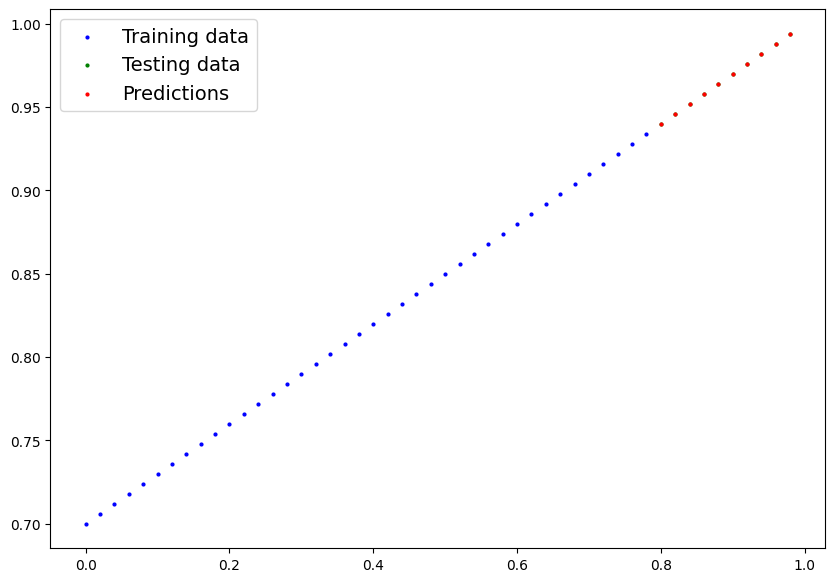

In [66]:
plot_predictions(predictions=y_pred)

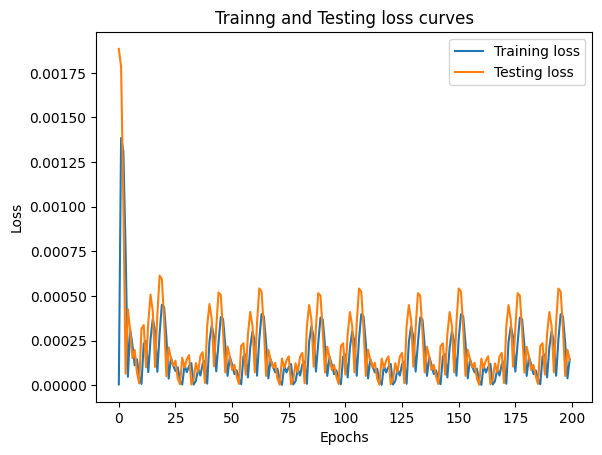

In [69]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(epoch_counts, np.array(torch.tensor(loss_values).numpy()), label="Training loss")
plt.plot(epoch_counts, np.array(torch.tensor(test_loss_values).numpy()), label="Testing loss")
plt.title("Trainng and Testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [68]:
### Saving and Load model
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2999]])),
             ('linear_layer.bias', tensor([0.6999]))])